In [1]:
%install_ext https://raw.githubusercontent.com/sberke/ipython-plantuml/master/plantuml_magics.py

Installed plantuml_magics.py. To use it, type:
  %load_ext plantuml_magics


C:\Anaconda\lib\site-packages\IPython\core\magics\extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


In [2]:

%load_ext plantuml_magics


In [3]:
import glob
glob.glob(r'./*.jar')

['.\\plantuml.jar']

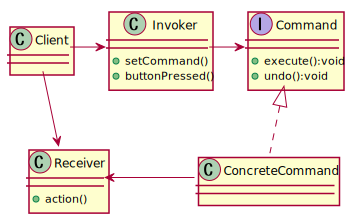

In [15]:
%%plantuml
@startuml
Interface Command{
    +execute():void
    +undo():void
    }
class ConcreteCommand
class Receiver{
    +action()
}
class Client
class Invoker{
    +setCommand()
    +buttonPressed()
}
Command <|.. ConcreteCommand
ConcreteCommand -left-> Receiver
Client --> Receiver
Client -right-> Invoker
Invoker -right->Command

@enduml

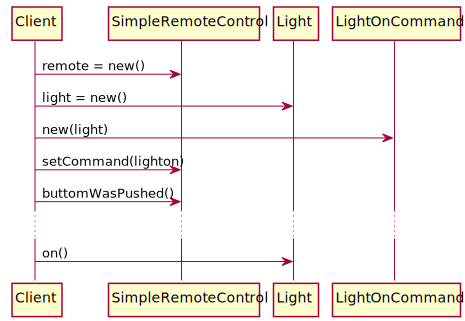

In [6]:
%%plantuml
@startuml
Client -> SimpleRemoteControl:remote = new()
Client -> Light: light = new()
Client -> LightOnCommand: new(light)
Client -> SimpleRemoteControl:setCommand(lighton)
Client -> SimpleRemoteControl:buttomWasPushed()
...
Client -> Light:on()
    @enduml

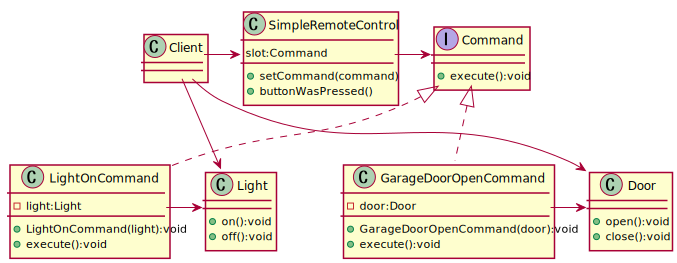

In [26]:
%%plantuml
@startuml
Interface Command{
    +execute():void
}
class GarageDoorOpenCommand{
    -door:Door
    +GarageDoorOpenCommand(door):void
    +execute():void
}
class Door{
    +open():void
    +close():void
}
class LightOnCommand{
    -light:Light
    +LightOnCommand(light):void
    +execute():void
}
class Light{
    +on():void
    +off():void
}
class SimpleRemoteControl{
    slot:Command
    +setCommand(command)
    +buttonWasPressed()
}
Command <|.. LightOnCommand
Command <|..GarageDoorOpenCommand
LightOnCommand -right-> Light
GarageDoorOpenCommand -right-> Door
SimpleRemoteControl -right-> Command
Client -right-> SimpleRemoteControl
Client --> Light
Client --> Door
@enduml

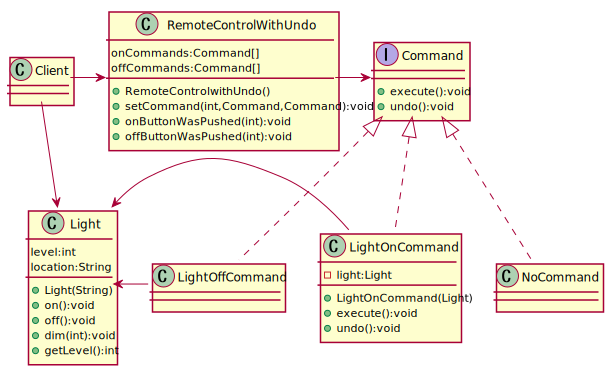

In [41]:
%%plantuml
@startuml

interface Command{
    +execute():void
    +undo():void
}

class LightOnCommand{
    -light:Light
    +LightOnCommand(Light)
    +execute():void
    +undo():void
}
class LightOffCommand
class Light{
    level:int
    location:String
    +Light(String)
    +on():void
    +off():void
    +dim(int):void 
    +getLevel():int
}
class NoCommand
class RemoteControlWithUndo{
    onCommands:Command[]
    offCommands:Command[]
    +RemoteControlwithUndo()
    +setCommand(int,Command,Command):void
    +onButtonWasPushed(int):void
    +offButtonWasPushed(int):void    
}
Command <|.. LightOnCommand
Command <|.. LightOffCommand
Command <|.. NoCommand
LightOnCommand -left-> Light
LightOffCommand -left-> Light
RemoteControlWithUndo -right-> Command
Client -> RemoteControlWithUndo
Client -down-> Light
@enduml